# First import dependencies
We require:


1.   tensorflow  (Google's ML framework)
2.   keras           (high level api working on top of tensoflow)
3.   numpy         (for fast numerical computation)
4.   matplotlib   (for ploting images)



In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Download dataset : Fashion MNIST dataset
## Dataset that consists of 70,000 images of 10 different categories of clothing
## Each image of size 28 by 28 (black and white)
## Dataset is split into train/test images with a 6:1 ratio

In [0]:
fashion_mnist=keras.datasets.fashion_mnist

In [0]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [56]:
print('train images shape : '+str(train_images.shape))
print('train labels shape : '+str(train_labels.shape))

print('test images shape : '+str(test_images.shape))
print('test labels shape : '+str(test_labels.shape))

train images shape : (60000, 28, 28)
train labels shape : (60000,)
test images shape : (10000, 28, 28)
test labels shape : (10000,)


## Currently the pixel values in these images range from 0-255. We normalize these values and bring it down to the range 0-1

In [0]:
train_images=train_images/255
test_images=test_images/255

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Pick a random image from the train data and plot it along with the class it belongs to

category is : Coat


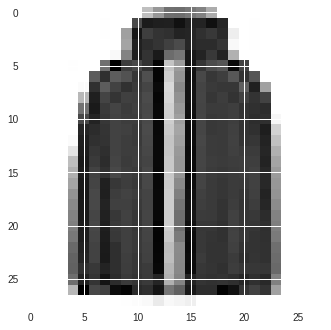

In [59]:
n=np.random.randint(0,60000)
img=train_images[n,:,:]
plt.imshow(img)
print('category is : '+class_names[train_labels[n]])

## Creating a model in keras to train the dataset on

In [0]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

# Compiling the model we just created by giving in 3 parameters : 


## *   Optimizer (how we reduce the loss function)
## *   Loss (the measure with which we calculate distance between the actual and predicted values)
## * Metrics (what we want our model to improve on)



In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# The actual training process
## We give the train images and train labels as inputs to train the model

In [62]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.5010 - acc: 0.8234
Epoch 2/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.3772 - acc: 0.8646
Epoch 3/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.3385 - acc: 0.8764
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.3154 - acc: 0.8847
Epoch 5/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.2970 - acc: 0.8913
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.2829 - acc: 0.8944
Epoch 7/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.2704 - acc: 0.8984
Epoch 8/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.2585 - acc: 0.9037
Epoch 9/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.2496 - acc: 0.9070
Epoch 10/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.2416 - acc: 0.911

# Evaluating our model on previously unseen test data

In [63]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 72us/step


[0.32642196986675265, 0.8841]

# Selecting a random image from the test dataset and predicting the class that it belongs to

predicted class is : Dress


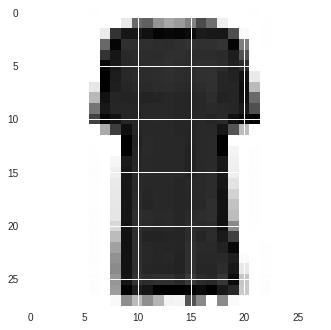

In [64]:
n=np.random.randint(0,10000)
test_img=test_images[n,:,:].reshape(1,28,28)
predicted_class_number=np.argmax(model.predict(test_img))
predicted_class=class_names[predicted_class_number]
plt.imshow(test_img[0,:,:])
print('predicted class is : '+predicted_class)